In [46]:
# these are some of the libraries we use for math operation data generation and visualization
import numpy as np # For Math operation
import matplotlib.pyplot as plt # For visualization
from sklearn.datasets import make_classification # For data generation
import seaborn as sns # For visualization

In [47]:
# we need a sigmoid function for generating probabilities the function can take either single or multiple input
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [48]:
#Example
sigmoid(5),sigmoid(np.array([1,2,3,4]))

(0.9933071490757153, array([0.73105858, 0.88079708, 0.95257413, 0.98201379]))

In [49]:
# Cost function is used to determine the distance of our predicted outcome from the actual one
# The cost function that we are using here is logloss since sigmoid function makes the output non linear which in turn 
# may create problem in making our model converge to right minima 
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta) # @ works as [1,2,3]@[1,2,3]=14 and theta are the coefficients
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

In [50]:
# Gradient descent optimizer this will calculate the values of new parameteres in order to reduce the cost
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [36]:
X.T @ (sigmoid(X @ params) - y)


array([[   4.        ],
       [   4.        ],
       [-266.20626365],
       [  -5.56588319]])

In [51]:
# Predict function
def predict(X, params):
    return np.round(sigmoid(X @ params))

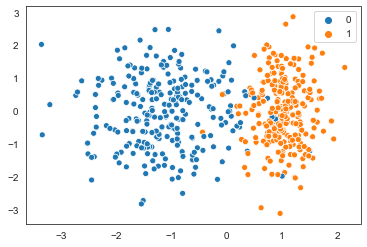

In [52]:
# Lets generate data considering 500 samples and 2 features only
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

array([[0.],
       [0.],
       [0.],
       [0.]])

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.45293068]
 [ 3.26552327]
 [ 0.03334871]] 



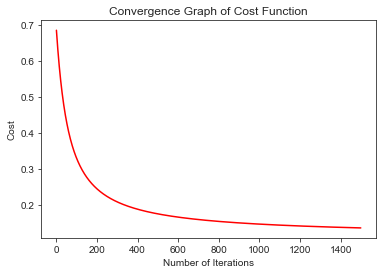

In [53]:
m = len(y)

X = np.hstack((np.ones((m,1)),X)) # Adding 1 parameter
n = np.size(X,1)
params = np.zeros((n,1)) # Getting no. of parameters 2 features and 1 bias

iterations =1500
learning_rate = 0.03     

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('ticks')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [54]:
y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(score)

0.966


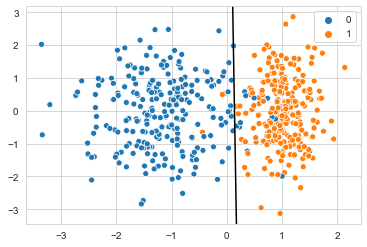

In [56]:
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('whitegrid')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");